# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


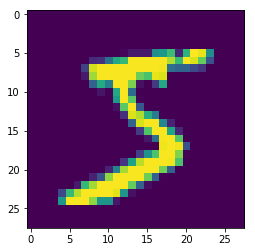

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Aim
*   Our aim in to get to 15K params & 99.4 accuracy in 4 code iterations and each iteration having max of 3 changes.
*   From the last iteration, we had 195k params and 99.2 test accuracy
*   Lets us reduce the params to 14.5k and check the accuracy. (#**Change1**)
*   We should expect the accuracy to reduce from 99.2.





In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26,26,10, params = 100

model.add(Convolution2D(20, 3, 3, activation='relu')) # 24,24,20, params = 1820
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22,22,20, params = 3620

model.add(MaxPooling2D(pool_size=(2, 2))) # 11,11,20, 
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11,11,10, params = 210

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9,9,16, params = 1456 
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7,7,16, params = 2320
model.add(Convolution2D(16, 3, 3, activation='relu')) # 5,5,16, params = 2320

model.add(Convolution2D(10, 1, activation='relu')) # 5,5,10, params = 170
model.add(Convolution2D(10, 5)) #1,1,10, params = 2510

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
#Added testing data accuracy and loss to verify.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2537 - acc: 0.9196 - val_loss: 0.0907 - val_acc: 0.9700
Epoch 2/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0803 - acc: 0.9757 - val_loss: 0.0585 - val_acc: 0.9805
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0624 - acc: 0.9802 - val_loss: 0.0493 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0520 - acc: 0.9845 - val_loss: 0.0440 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0452 - acc: 0.9852 - val_loss: 0.0410 - val_acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0389 - acc: 0.9878 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0351 - acc: 0.9886 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03319468683676096, 0.9898]


# Observations of the result : 

*   Our test accuracy reduced to 98.98%
*   Our training accuracy after 2nd epoch is 98.05%, which suggests we are going in the right direction.
*   Our training accuracy is increasing with each epoch, so increase in number of epochs should give better results
*   The time taken for one epoch has reduced to 12 secs.



# Epochs
*   Increasing the number of Epochs to 25 (#**Change 2**)
*   We are expecting our Training & Test Accuracy to increase




In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
  800/60000 [..............................] - ETA: 13s - loss: 0.0187 - acc: 0.9938

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 12s 198us/step - loss: 0.0237 - acc: 0.9923 - val_loss: 0.0369 - val_acc: 0.9886
Epoch 2/25
60000/60000 [==============================] - 12s 205us/step - loss: 0.0225 - acc: 0.9925 - val_loss: 0.0376 - val_acc: 0.9890
Epoch 3/25
60000/60000 [==============================] - 13s 214us/step - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0309 - val_acc: 0.9907
Epoch 4/25
60000/60000 [==============================] - 12s 194us/step - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0323 - val_acc: 0.9908
Epoch 5/25
60000/60000 [==============================] - 12s 194us/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0556 - val_acc: 0.9871
Epoch 6/25
60000/60000 [==============================] - 13s 214us/step - loss: 0.0179 - acc: 0.9946 - val_loss: 0.0348 - val_acc: 0.9890
Epoch 7/25
60000/60000 [==============================] - 12s 192us/step - loss: 0.0168 - acc: 0.9945 - val_loss: 0.0408 - val_acc: 0.9886
Epoch 8/25
60000/60000 [==============

# Observations
*   Our Test Accuracy increased to 99.19 in the 16th Epoch
*   Our Training Accuracy continued to increase till 99.69, however there is a large gap between training and test accuracy( less) suggesting a overfitting problem.
*   The epoch time has slightly reduced to 11secs.




In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.04305988833384772, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[3.43253870e-10 1.96056558e-08 3.32087643e-06 1.69936698e-07
  7.03496261e-10 9.87919879e-09 3.35043226e-19 9.99996424e-01
  1.29531412e-11 7.51353753e-08]
 [2.92859036e-11 5.12491738e-07 9.99999046e-01 2.26720413e-11
  5.31355721e-13 8.04788125e-10 4.22842646e-07 3.40807352e-12
  1.97492955e-09 1.52471490e-11]
 [3.96338251e-09 9.99969959e-01 5.32001479e-07 3.45384901e-11
  5.35611116e-06 2.24454107e-05 9.93296041e-08 1.34588356e-06
  1.22430137e-07 2.06644913e-07]
 [9.99977589e-01 2.65078182e-10 2.80506765e-06 1.83038924e-06
  8.26443625e-08 3.47804274e-08 7.43778355e-06 5.51216246e-08
  2.82025781e-06 7.30607280e-06]
 [1.08679322e-10 2.25408270e-09 1.61054547e-09 2.45416946e-12
  9.99896765e-01 1.14673956e-11 7.15552986e-08 2.97417603e-12
  1.62565037e-08 1.03083621e-04]
 [1.02935624e-08 9.99492168e-01 3.51902884e-07 3.14663812e-12
  5.01998758e-04 7.69898691e-07 1.18846138e-07 3.92126094e-06
  2.47417319e-07 3.92419167e-07]
 [1.55583391e-12 2.89059244e-06 2.06913153e-10 6.33514741e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_16'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored